         count
cluster       
 2          73
-1          58
 4          32
 0          16
 3           7
 6           6
 1           4
 5           4


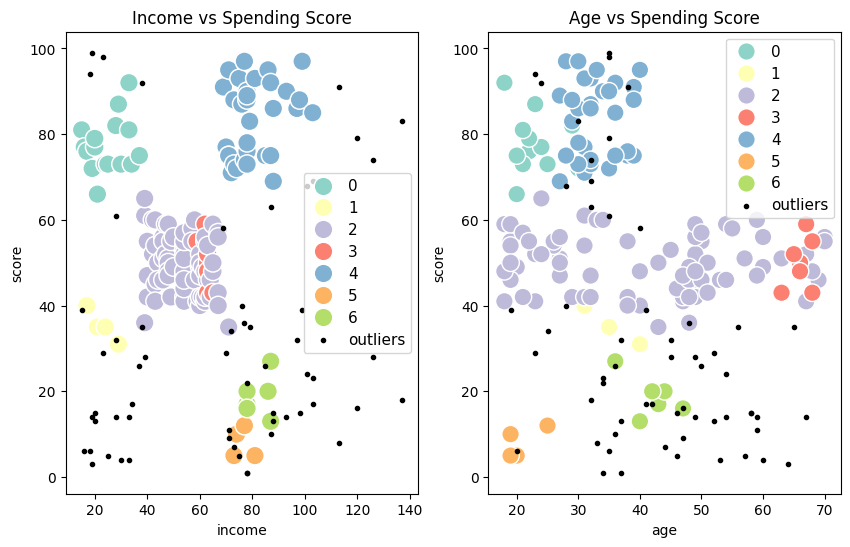

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/Mall_Customers[1].csv')
data.rename(columns={
    'CustomerID': 'customer_id',
    'Genre': 'gender',
    'Age': 'age',
    'Annual Income (k$)': 'income',
    'Spending Score (1-100)': 'score'
}, inplace=True)
features = ['age', 'income', 'score']

# Prepare the data for clustering
train_x = data[features]

# Apply DBSCAN algorithm with new parameters
cls = DBSCAN(eps=9.5, min_samples=4).fit(train_x)  # Changed eps to 10 and min_samples to 5

# Copy dataset and add cluster labels
datasetDBSCAN = train_x.copy()
datasetDBSCAN.loc[:, 'cluster'] = cls.labels_

# Display the number of points in each cluster
print(datasetDBSCAN['cluster'].value_counts().to_frame())

# Identify and isolate outliers
outliers = datasetDBSCAN[datasetDBSCAN['cluster'] == -1]

# Plotting the clusters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Scatter plot of income vs spending score
sns.scatterplot(
    x='income', y='score',
    data=datasetDBSCAN[datasetDBSCAN['cluster'] != -1],
    hue='cluster', ax=ax1, palette='Set3', legend='full', s=180
)
ax1.scatter(outliers['income'], outliers['score'], s=9, label='outliers', c="k")
ax1.legend()
ax1.set_title('Income vs Spending Score')

# Scatter plot of age vs spending score
sns.scatterplot(
    x='age', y='score',
    data=datasetDBSCAN[datasetDBSCAN['cluster'] != -1],
    hue='cluster', ax=ax2, palette='Set3', legend='full', s=160
)
ax2.scatter(outliers['age'], outliers['score'], s=9, label='outliers', c="k")
ax2.legend()
ax2.set_title('Age vs Spending Score')

# Adjust legend font size
plt.setp(ax1.get_legend().get_texts(), fontsize='11')
plt.setp(ax2.get_legend().get_texts(), fontsize='11')

# Show the plots
plt.show()